In [26]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,  Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Load the data! We need only xtrain
(Xtrain,_),(_,_)=mnist.load_data()

In [28]:
print(Xtrain.shape)

(60000, 28, 28)


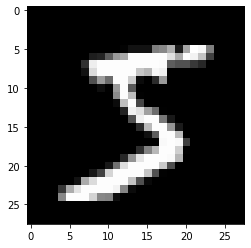

In [29]:
plt.imshow(Xtrain[0],cmap='gray')
plt.show()

In [30]:
#Normalize the data
#127.5 is the half of max pixel value 255
Xtrain=(Xtrain.astype('float32')-127.5)/127.5 
print(np.min(Xtrain))
print(np.max(Xtrain))
#we see tha data has come between -1 and 1
Xtrain=Xtrain.reshape((-1,784))
#reshape the data to feed to discriminator

-1.0
1.0


In [31]:
Total_epochs=50
batch_size=256
no_of_batches=int(Xtrain.shape[0]/batch_size)
half_batch=int(batch_size/2)
#pick half batch of fake data and half of real data
noise_dim=10 #upsample to 784 Dim Vector
adam=Adam(lr=2e-4,beta_1=0.5)
#optimizer

In [32]:
#Generator
#inputs a 10 dim vector and o/ps a 784 dim vector
generator=Sequential()
generator.add(Dense(256,input_shape=(noise_dim,),activation=LeakyReLU(0.2)))
#0.2 is the value of alpha i.e the slope when x<0
generator.add(Dense(512,activation=LeakyReLU(0.2)))
generator.add(Dense(1024,activation=LeakyReLU(0.2)))
generator.add(Dense(784,activation='tanh'))
#Final Activation layer is tanh to get ans b/w -1 & 1
#and final o/p is 784
generator.compile(loss='binary_crossentropy',optimizer=adam)
#loss is binary cross entropy as we declare 0 or  1(real or fake)
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_17 (Dense)             (None, 784)               803600    
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Discriminator
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,),activation=LeakyReLU(0.2)))
discriminator.add(Dense(256,activation=LeakyReLU(0.2)))
discriminator.add(Dense(1,activation='sigmoid'))
#sigmoid gives value between 0 & 1 i.e probability of data being real
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
#o/p is real or fake data( so use binary cross entropy)
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Combining the two neural networks
#GAN(Step2)
#here we will make a model with discriminator as frozen as generator as trainable
discriminator.trainable=False
#we input noise vector to generator
gan_input=Input(shape=(noise_dim,))
#then generator generates an image
generated_img=generator(gan_input)
#this generated image is fed to discriminator
gan_output=discriminator(generated_img)

#Functional API
#combine the above two
model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [35]:
#a fucntion to save the images generated
def save_imgs(epoch,samples=100):
  #here we aleady have trained generator model and we directly generate images
  noise=np.random.normal(0,1, size=(samples,noise_dim))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

epoch 1.0000 disc loss 0.6382 gen loss= 0.9542
epoch 2.0000 disc loss 0.6434 gen loss= 1.0272
epoch 3.0000 disc loss 0.6262 gen loss= 1.1819
epoch 4.0000 disc loss 0.5950 gen loss= 1.2685
epoch 5.0000 disc loss 0.6011 gen loss= 1.2276


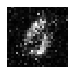

epoch 6.0000 disc loss 0.5696 gen loss= 1.3295
epoch 7.0000 disc loss 0.5625 gen loss= 1.3511
epoch 8.0000 disc loss 0.5619 gen loss= 1.3302
epoch 9.0000 disc loss 0.5751 gen loss= 1.2850
epoch 10.0000 disc loss 0.6169 gen loss= 1.1766


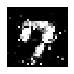

epoch 11.0000 disc loss 0.6328 gen loss= 1.0917
epoch 12.0000 disc loss 0.6431 gen loss= 1.0585
epoch 13.0000 disc loss 0.6390 gen loss= 1.0333
epoch 14.0000 disc loss 0.6375 gen loss= 1.0481
epoch 15.0000 disc loss 0.6420 gen loss= 1.0456


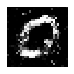

epoch 16.0000 disc loss 0.6431 gen loss= 1.0367
epoch 17.0000 disc loss 0.6405 gen loss= 1.0452
epoch 18.0000 disc loss 0.6395 gen loss= 1.0429
epoch 19.0000 disc loss 0.6433 gen loss= 1.0232
epoch 20.0000 disc loss 0.6460 gen loss= 1.0255


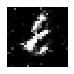

epoch 21.0000 disc loss 0.6473 gen loss= 1.0259
epoch 22.0000 disc loss 0.6534 gen loss= 1.0164
epoch 23.0000 disc loss 0.6562 gen loss= 1.0034
epoch 24.0000 disc loss 0.6553 gen loss= 1.0094
epoch 25.0000 disc loss 0.6576 gen loss= 1.0055


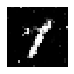

epoch 26.0000 disc loss 0.6566 gen loss= 1.0045
epoch 27.0000 disc loss 0.6568 gen loss= 1.0018
epoch 28.0000 disc loss 0.6584 gen loss= 1.0013
epoch 29.0000 disc loss 0.6614 gen loss= 0.9969
epoch 30.0000 disc loss 0.6633 gen loss= 0.9884


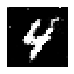

epoch 31.0000 disc loss 0.6630 gen loss= 0.9869
epoch 32.0000 disc loss 0.6617 gen loss= 0.9900
epoch 33.0000 disc loss 0.6630 gen loss= 0.9885
epoch 34.0000 disc loss 0.6651 gen loss= 0.9807
epoch 35.0000 disc loss 0.6646 gen loss= 0.9885


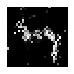

epoch 36.0000 disc loss 0.6645 gen loss= 0.9827
epoch 37.0000 disc loss 0.6650 gen loss= 0.9875
epoch 38.0000 disc loss 0.6641 gen loss= 0.9957
epoch 39.0000 disc loss 0.6655 gen loss= 0.9784
epoch 40.0000 disc loss 0.6652 gen loss= 0.9830


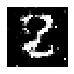

epoch 41.0000 disc loss 0.6666 gen loss= 0.9762
epoch 42.0000 disc loss 0.6655 gen loss= 0.9790
epoch 43.0000 disc loss 0.6669 gen loss= 0.9829
epoch 44.0000 disc loss 0.6658 gen loss= 0.9833
epoch 45.0000 disc loss 0.6667 gen loss= 0.9843


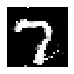

epoch 46.0000 disc loss 0.6675 gen loss= 0.9788
epoch 47.0000 disc loss 0.6660 gen loss= 0.9800
epoch 48.0000 disc loss 0.6674 gen loss= 0.9840
epoch 49.0000 disc loss 0.6678 gen loss= 0.9793
epoch 50.0000 disc loss 0.6694 gen loss= 0.9771


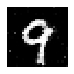

In [37]:
#Training Loop
d_losses=[]
g_losses=[]
for epoch in range(Total_epochs):
  epoch_d_loss=0.0
  epoch_g_loss=0.0
  #mini batch SGD
  for step in range(no_of_batches):
    #Step 1 First train discriminator
    #50 % real and 50% fake data
    idx=np.random.randint(0,Xtrain.shape[0],half_batch)
    # we pick 128 indexes in range 0  to 60000 these will be the indexes of real images
    real_imgs=Xtrain[idx]
    #This was Real Data
    #Now fake data
    noise=np.random.normal(0,1,size=(half_batch,noise_dim))
    # we generate a noise vector for each image of size noise_dim
    fake_imgs=generator.predict(noise) # we havent used fit we directly predicted using random noise i. only forward pass
    #labels for real and fake images
    real_y=np.ones((half_batch,1))*0.9 #one sided label smoothing for discriminator
    fake_y=np.zeros((half_batch,1))
    #Train the discriminator first with real and then with fake data
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake #weighted loss! here we hve taken equal weightage
    epoch_d_loss+=d_loss


    #Step 2Train the generator by freezing the discriminator(we have already developed above a model where discriminator is frozen)
    noise=np.random.normal(0,1,size=(batch_size,noise_dim))
    # we generate a full batch of fake images i.e 256 and send to discriminator to check with ground truth given as 1
    ground_truth_y=np.ones((batch_size,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    #this model has both generator and discriminator so it creates images automatically from noise
    epoch_g_loss+=g_loss
  g_losses.append(epoch_g_loss)
  d_losses.append(epoch_d_loss)
  print("epoch %0.4f disc loss %0.4f gen loss= %0.4f" %(epoch+1,epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  if (epoch+1)%5==0:
    #we save the model and images after 5 epochs
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)

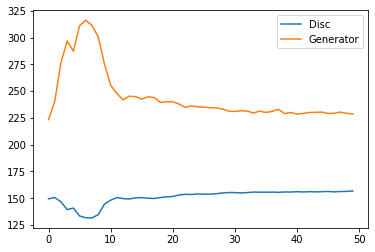

In [40]:
#plotting losses
plt.plot(d_losses,label='Disc')
plt.plot(g_losses,label='Generator')
plt.legend()
plt.show()